<a href="https://colab.research.google.com/github/FrankPorto/frank_rep/blob/main/MVP2_a_Franklin_da_Silva_Porto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pós-Graduação em Ciência de Dados e Analytics - PUC-Rio
**MVP -Módulo II - BRASILEIRÃO DE PONTOS CORRIDOS - CHANCES DE TÍTULOS FUTUROS**

**Aluno: Franklin da Silva Porto**


**RA: 4052023000124**

**PARTE a)**

**1.   *Introdução - Parte a)***

Dando continuidade ao primeiro MVP, ainda com o tema do Brasileirão de pontos corridos, dessa vez apresento as chances de futuros títulos e quedas das equipes participantes. Devido a estrutura dos atributos e do problema, será itilixada a técnica de REGRESSÃO LINEAR MÚLTIPLA.

**2.   *Definição do problema***

  2.1 *Qual é a descrição do problema?*

Várias mídias esportivas e amantes do futebol, buscam assuntos relacionados aos seus times de coração, como chance de título, artilharia, chance de rebaixamento, dentre outros. Tendo essas coisas em vista, apresento este MVP como uma opção para que tais mídias, fãs e até mesmo apostadores(devido a alta demanda de casas de apostas virtuais) usem essa tecnologia para seus interesses.

  2.2 *Você tem premissas ou hipóteses sobre o problema? Quais?*

Devido a fatores financeoros e históricos, obviamente existem times que sempre estarão no topo do favoritismo, os chamados popularmente de "times grandes". Por possuírem mais investimentos financeiros, possuirem maior número de torcedores e terem maior tradição, tais times contratam os melhores jogadores e profissionais da comissão técnica e possuem as melhores infraestruturas  em seus clubes e sedes.

  2.3 *Que restrições ou condições foram impostas para selecionar os dados?*

Nenhuma pois os dados foram derivados do Dataset do MVP anterior.

  2.4 *Descreva o seu dataset (atributos, imagens, anotações, etc).*

O Dataset original foi usado no primeiro MVP e serviu de base para o Dataset atual. Segue a lista dos atributos:

*   NUM: número sequencial do time;
*   TIME: Descrição do time;
*   FUNDACAO: data da fundação do time;
*   ESTADO: Estado da Federação no qual o time pertence;
*   TOTVIT: total de vitórias do time;
*   TOTGOLCASA: total de gols em casa;
*   TOTGOLFORA: total de gols fora de casa;
*   TITULOS: total de títulos do time;
*   TARGET: resultado(chance de título).


**3.   *Pré-processamento***

Sobre o Dataset analisado, foi utilizado um arquivo .csv, derivado do arquivo utilizado no primeiro MVP, contendo dados sobre todos os times que jogaram a primeira divisão do campeonato brasileiro de futebol, dos anos de 2003 (quando começou o formato “pontos corridos”) até 2020. .

  3.1 *Definição dos atributos/colunas do Dataset*

O arquivo, denominado "MV2.csv", possui os seguintes atributos:




**4.   *Análise dos Dados***





In [17]:
# Configuração para não exibir os warnings
import warnings
warnings.filterwarnings("ignore")

# Imports necessários
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split # para particionar em bases de treino e teste (holdout)
from sklearn.model_selection import KFold # para preparar os folds da validação cruzada
from sklearn.model_selection import cross_val_score # para executar a validação cruzada
from sklearn.metrics import mean_squared_error # métrica de avaliação MSE
from sklearn.linear_model import LinearRegression # algoritmo Regressão Linear
from sklearn.linear_model import Ridge # algoritmo Regularização Ridge
from sklearn.linear_model import Lasso # algoritmo Regularização Lasso
from sklearn.neighbors import KNeighborsRegressor # algoritmo KNN
from sklearn.tree import DecisionTreeRegressor # algoritmo Árvore de Regressão
from sklearn.svm import SVR # algoritmo SVM

In [18]:
# Carga do dataset

url_dados = r"./DS_BRA2.csv"
df_bra = pd.read_csv(url_dados, sep = ',')

df_bra.head()


,NUM,TIME,FUNDACAO,ESTADO,TOTVIT,TOTGOLCASA,TOTGOLFORA,TITULOS,TARGET
0,1,América-MG,30/04/1912,MG,25,68,36,0,8.78
1,2,América-RN,14/04/1915,RN,4,12,17,0,2.36
2,3,Athlético-PR,26/03/1924,PR,266,557,339,0,81.57
3,4,Atlético-GO,02/04/1937,GO,51,119,97,0,18.81
4,5,Atlético-MG,25/03/1908,MG,267,582,385,0,86.60


*4.1 Regressão*

In [19]:
# Preparação dos dados

# Separação em bases de treino e teste (holdout)
array = ds_bra.values
X = array[:,4:8] # atributos
y = array[:,8] # classe (target)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7) # faz a divisão

# Criando os folds para a validação cruzada
num_particoes = 10 # número de folds da validação cruzada
kfold = KFold(n_splits=num_particoes, shuffle=True, random_state=7) # faz o particionamento em 10 folds

*4.2 Modelagem*

Na Modelagem a seguir, devido ao resultado dos algoritmos de LR, RIDGE e LASSO ter dado empate, foi necessário alocar 9 casas decimais no resultado, para que surgisse mais valores e facilitasse a escolha do algoritmo:  

LR: MSE 0.000000000 (0.000000000) - RMSE 0.000000000
Ridge: MSE 0.000000536 (0.000001060) - RMSE 0.000731905
Lasso: MSE 0.004074468 (0.005213238) - RMSE 0.063831557
KNN: MSE 22.809555600 (24.834444807) - RMSE 4.775935050
CART: MSE 11.501020000 (10.906504546) - RMSE 3.391315379
SVM: MSE 852.788912840 (614.797168732) - RMSE 29.202549766


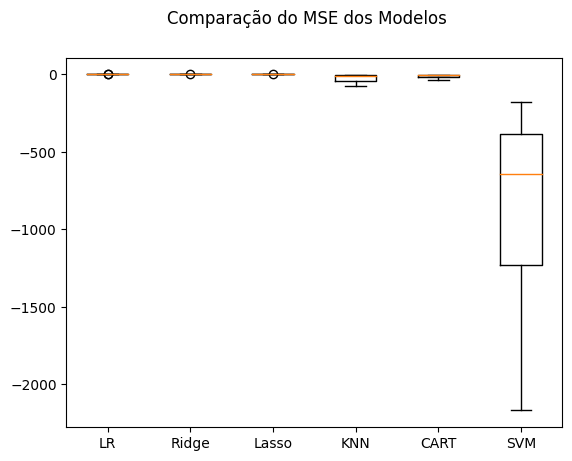

In [20]:
# Definindo uma seed global para esta célula de código
np.random.seed(10)

# Listas para armazenar os modelos, os resultados e os nomes dos modelos
models = []
results = []
names = []

# Preparando os modelos e adicionando-os em uma lista
models.append(('LR', LinearRegression()))
models.append(('Ridge', Ridge()))
models.append(('Lasso', Lasso()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor()))
models.append(('SVM', SVR()))

# Avaliando um modelo por vez
for name, model in models:
  cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='neg_mean_squared_error')
  results.append(cv_results)
  names.append(name)
  # imprime MSE, desvio padrão do MSE e RMSE dos 10 resultados da validação cruzada
  msg = "%s: MSE %0.9f (%0.9f) - RMSE %0.9f" % (name, abs(cv_results.mean()), cv_results.std(), np.sqrt(abs(cv_results.mean())))
  print(msg)

# Boxplot de comparação dos modelos
fig = plt.figure()
fig.suptitle('Comparação do MSE dos Modelos')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

Como pode-se observar no boxplot, o algoritmo de Regressão Linear foi a melhor opção.

In [21]:
# Criando um modelo com todo o conjunto de treino
model = LinearRegression()
model.fit(X_train, y_train)

# Fazendo as predições com o conjunto de teste
predictions = model.predict(X_test)

# Estimando o MSE e o RMSE no conjunto de teste
mse = mean_squared_error(y_test, predictions)
print("MSE %0.9f" % mse)
print("RMSE %0.9f" % np.sqrt(abs(mse)))

MSE 0.000000000
RMSE 0.000000000


In [22]:
#Intercepto
model.intercept_

4.973799150320701e-14

In [23]:
#Coeficientes de Regressão
model.coef_

array([0.1 , 0.05, 0.08, 0.01])

In [24]:
#Modelo de Predição
model.predict(X_train)

array([ 4.28, 27.68, 81.57, 36.84, 95.72, 20.49, 15.58, 19.62, 19.39,
        6.88,  2.21,  8.78, 18.24, 81.72, 16.89, 42.3 , 34.6 ,  4.87,
       11.36, 84.56, 66.25, 68.98, 38.98, 82.28,  2.21, 83.95, 90.83,
       18.81, 12.31, 86.6 ])

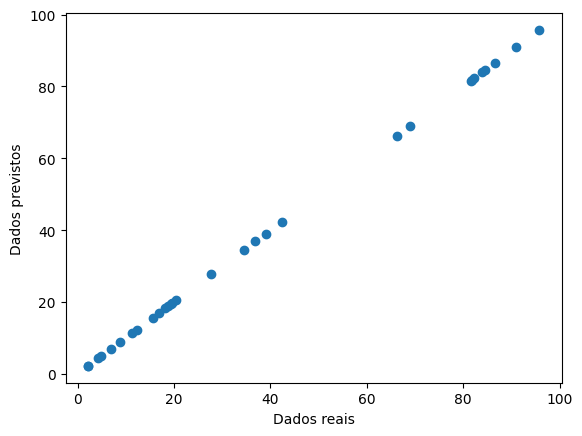

In [25]:
plt.scatter(y_train, model.predict(X_train))
plt.xlabel('Dados reais')
plt.ylabel('Dados previstos')
plt.show()

Como visto no gráfico de dispersão acima, os dados reais e previstos são idênticos, não houve erros.

Lista dos times mais bem colocados com suas respectivas probabilidades de ser campeão e rebaixados dos próximos anos:

In [51]:
df_Ord = df_bra.sort_values(by='TARGET', ascending=False)
df_Ord.loc[:, ["TIME","TARGET"]]

,TIME,TARGET
41,SãoPaulo,97.51
38,Santos,95.72
19,Flamengo,90.83
17,Cruzeiro,90.17
20,Fluminense,86.77
4,Atlético-MG,86.60
26,Internacional,84.56
23,Grêmio,83.95
14,Corinthians,82.28
31,Palmeiras,81.72


CONCLUSÃO

Segundo o que foi analisado, concluo que o modelo foi eficiente nos resultados das colocações dos times analisados.  